# Session 9 - Natural Language Processing

You need to read the theory lectures before practicing with this notebook:
- [Preclass S4](https://hackmd.io/@KylePaul/ML_Preclass_S9)
- [Slide](https://hackmd.io/@KylePaul/ML_Slide_S9)

```{contents}

```

# RNN with Tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Embedding, TimeDistributed

Imagine we build a model that predicts the temperature of a day based on the previous 30 days.

What the RNN model should look like:
- What does the input data look like?
- What is the output?

In [ ]:
# batch_size, time_step, n_features (n, 30, 1)
model = Sequential()
model.add(Input(shape=(30, 1)))
model.add(SimpleRNN(1))       # tanh (-1, 1) (default)
model.add(Dense(1))           # fully-connected layer with linear activation to map into temperature range
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In language processing, there is 1 type of problem called Token Classification. Used to:
- Entity identification (NER): which word in a sentence indicates a person's name, place name, time, etc.
- Part of Speech (POS): nouns, adjectives, verbs, adverbs

What the RNN model should look like:
- What does the input data look like?
- What is the output?

In [ ]:
model = Sequential([
    Input(shape=(500, 128)),
    SimpleRNN(64, return_sequences=True),  # return the representation of token/timestep (many to many)
    TimeDistributed(Dense(10, activation="softmax"))  # one dense predicting for each timestep
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 500, 64)           12352     
                                                                 
 time_distributed_1 (TimeDis  (None, 500, 10)          650       
 tributed)                                                       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


**Stacked RNN**

![](https://amitness.com/images/rnn-stacked.png)

In [ ]:
model = Sequential()
model.add(SimpleRNN(200, input_shape=(700, 100),
                    return_sequences=True)) # return_sequences is required here
# whether return_sequences is required or not is based on each different task
model.add(SimpleRNN(100))
# and prediction layer also change based on that
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 700, 200)          60200     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 100)               30100     
                                                                 
Total params: 90,300
Trainable params: 90,300
Non-trainable params: 0
_________________________________________________________________


- `model = Sequential()` creates a sequential model object, which is a linear stack of layers that can be easily built and trained⁶.
- `model.add(SimpleRNN(200, input_shape=(700, 100), return_sequences=True))` adds a SimpleRNN layer to the model, which is a fully-connected recurrent neural network where the output is fed back to the input¹². This layer has 200 units, which means it has 200 hidden states and output values. The input shape is (700, 100), which means the input has 700 time steps and 100 features per time step. The return_sequences argument is set to True, which means the layer returns the full sequence of output values for each input sequence, not just the last one.
- `model.add(SimpleRNN(100))` adds another SimpleRNN layer to the model, with 100 units. This layer does not specify the input shape, because it inherits it from the previous layer. The return_sequences argument is set to False by default, which means the layer only returns the last output value for each input sequence.



### Simple Example of Return Sequences

- The return_sequences argument is a boolean flag that determines whether the SimpleRNN layer returns the full sequence of output values for each input sequence, or only the last one. This is useful when you want to stack multiple recurrent layers on top of each other, or when you want to use the output sequence for further processing .

- For example, suppose you have an input sequence of length 4, and each time step has 3 features. The input shape would be (4, 3). If you pass this input to a SimpleRNN layer with 2 units and return_sequences=True, the output shape would be (4, 2), because the layer returns 2 output values for each of the 4 time steps. The output sequence would look something like this:

  `[[0.1, -0.2], [0.3, -0.4], [0.5, -0.6], [0.7, -0.8]]`

- However, if you set return_sequences=False, the output shape would be (2,), because the layer only returns the last output value for each input sequence. The output value would look something like this:

  `[0.7, -0.8]`


**Bidirectional RNN**

![](https://i.imgur.com/BtjtlMA.png)

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Input(shape=(128, 10)))
model.add(Bidirectional(SimpleRNN(64 )))  # two concatenated layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              9600      
 l)                                                              
                                                                 
Total params: 9,600
Trainable params: 9,600
Non-trainable params: 0
_________________________________________________________________


**Sequence to sequence**

Used for auto completion

![](https://tiensu.github.io/images/post/encoder_decoder_predict.png)

- Inital parameters for encoder is either random or intialized zero
- Final state of encodeer is ser as initial state of decoder
- The training technique: Teacher Forcing, instead of input $y'_1$, we input $y_1$ which is true

In [ ]:
from tensorflow.keras.models import Model

# input shape
input_seq_length = 512
input_dim = 128
# hidden unit
hidden_units = 256

encoder_inputs = Input(shape=(input_seq_length, input_dim))
# return hidden_state to be initial_state for decoder
encoder = SimpleRNN(hidden_units, return_state=True)
encoder_outputs, encoder_state = encoder(encoder_inputs)

In [ ]:
# Define the output sequence length and dimensionality
decoder_input_seq_length = 512
decoder_input_dim = 128
decoder_hidden_units = 256
output_vocab = 10000

# Define the input layer for the decoder
decoder_inputs = Input(shape=(decoder_input_seq_length, decoder_input_dim))
# Define the SimpleRNN layer as the decoder, using the encoder's state as initial state
decoder = SimpleRNN(decoder_hidden_units, return_sequences=True)(decoder_inputs, initial_state=encoder_state)
# Define the output layer
output_layer = TimeDistributed(Dense(output_vocab, activation="softmax"))(decoder)

# Create the model
model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=output_layer)

# Print the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 512, 128)]   0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 512, 128)]   0           []                               
                                                                                                  
 simple_rnn_5 (SimpleRNN)       [(None, 256),        98560       ['input_4[0][0]']                
                                 (None, 256)]                                                     
                                                                                                  
 simple_rnn_6 (SimpleRNN)       (None, 512, 256)     98560       ['input_5[0][0]',            

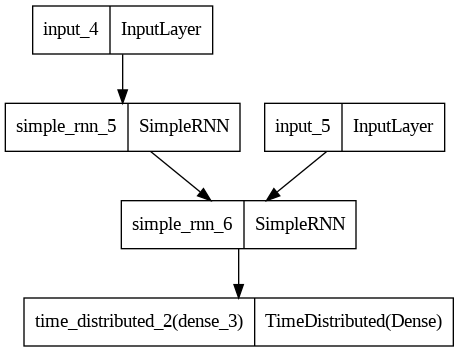

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

# Comment Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install py_vncorenlp

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.0 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4305 sha256=e5fe8a2d34e60c5e70bdb3bac7d02db13361075598db8a9670f33a0c18a5b860
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML-intensive/data/sentiment_small.csv")
df.head()

,review,label
0,Lần trước mình mua áo gió màu hồng rất ok mà đ...,1
1,Các siêu phẩm thấy cấu hình toàn tựa tựa nhau ...,1
2,Đồng hồ đẹp nhưng 1 cái đứt dây 1 cái không ch...,1
3,Giao thiếu mình cái này rồi shop ơi,1
4,không hài lòng sản phẩm cho lắm giặt lần đầu t...,1


In [ ]:
for review in df["review"].values:
  print(review)

Lần trước mình mua áo gió màu hồng rất ok mà đợt này lại giao 2 cái áo gió chất khác như vải mưa ý
Các siêu phẩm thấy cấu hình toàn tựa tựa nhau không còn sự đột phá lớn nữa
Đồng hồ đẹp nhưng 1 cái đứt dây 1 cái không chạy mua về phải sửa
Giao thiếu mình cái này rồi shop ơi
không hài lòng sản phẩm cho lắm giặt lần đầu tiên đã nhòe màu
Đồng hồ thì đẹp thật nhưng tại sao kim lúc chạy lúc đứng
Cũng hơi bất tiện
Toàn hàng trung quốc khi mua quên không coi kĩ
Shop giao hàng không giống màu
Shop giao sai màu đặt màu xanh da trời shop giao màu nõn chuối
không thấy đèn sáng
hàng bị lỗi nhiều quá màn hình bị cháy
Đóng gói sản phẩm rất kém
Tư vấn không nhiệt tình
Sản phẩm không an toàn quá nguy hiểm cho người sử_dụng
Không đáng để mua sản phẩm này 
Thời gian giao hàng lâu
Khẩu trang mỏng tang không biết có phải do giá sale không mà chất lượng chán thế
Chất lượng quá kém giao hàng không đúng mẫu
Đặt lần 2 rồi mà giao hàng lâu quá vậy
Shop hết hàng nhưng không báo 
Thấy ghi đc tặng kèm tã quần đến

In [ ]:
import py_vncorenlp # word segmentor
segmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/drive/MyDrive/Colab Notebooks/ML-intensive/data/vncorenlp')

In [ ]:
segmenter.word_segment("Hôm nay tôi rất thất vọng")

['Hôm_nay tôi rất thất_vọng']

#### TODO 1

Complete the function by following the guildance:
- Remove leading and ending spaces
- Convert characters to lowercase
- Apply `word_segment` to convert to new sentences and `return`

In [ ]:
def word_segment(text):
  text = text.strip().lower()
  text = segmenter.word_segment(text)[0]
  return text

segmenter.word_segment("Hôm nay tôi nhận được bài kiểm tra điểm rất kém và tôi rất thất vọng")

['Hôm_nay tôi nhận được bài kiểm_tra điểm rất kém và tôi rất thất_vọng']

In [ ]:
df["review"] = df["review"].apply(word_segment)
df.head()

,review,label
0,lần trước mình mua áo_gió màu hồng rất ok mà đ...,1
1,các siêu phẩm thấy cấu_hình toàn tựa tựa nhau ...,1
2,đồng_hồ đẹp nhưng 1 cái đứt dây 1 cái không ch...,1
3,giao thiếu mình cái này rồi shop ơi,1
4,không hài_lòng sản_phẩm cho lắm giặt lần đầu_t...,1


#### TODO 2

Tokenizer: count the number of words in a data set


In [ ]:
word_set = set()
for review in df["review"].values:
  review_words = review.split()
  for word in review_words:
    word_set.add(word)

print(len(word_set))

232


In [ ]:
# import Tokenizer để tách từ
from tensorflow.keras.preprocessing.text import Tokenizer
# import pad_sequences để lấy số từ mỗi câu là như nhau
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tensorflow phiên bản mới có cung cấp layer để gộp 2 bước này
# Trong bài Lab này, ta vẫn dùng cách cũ vì ta muốn đi từng bước một

In [ ]:
VOCAB_SIZE = len(word_set)

In [ ]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="oov", split=" ", filters="")
tokenizer.fit_on_texts(df["review"].values)

In [ ]:
tokenizer.word_index

{'oov': 1,
 'không': 2,
 'hàng': 3,
 'rất': 4,
 'giao': 5,
 'sản_phẩm': 6,
 'chất_lượng': 7,
 'shop': 8,
 'đẹp': 9,
 'màu': 10,
 'và': 11,
 'tuyệt_vời': 12,
 'nhanh': 13,
 'mà': 14,
 'nhưng': 15,
 'với': 16,
 'thấy': 17,
 'quá': 18,
 'tốt': 19,
 'mình': 20,
 'mua': 21,
 'cái': 22,
 'rồi': 23,
 'lắm': 24,
 'hơi': 25,
 'đặt': 26,
 'đóng_gói': 27,
 'kém': 28,
 'lần': 29,
 'này': 30,
 'siêu': 31,
 'toàn': 32,
 'đã': 33,
 'thì': 34,
 'khi': 35,
 'tư_vấn': 36,
 'nhiệt_tình': 37,
 'thời_gian': 38,
 'giá': 39,
 'đúng': 40,
 'đc': 41,
 'giày': 42,
 'dùng': 43,
 'áo_gió': 44,
 'ok': 45,
 '2': 46,
 'như': 47,
 'vải': 48,
 'tựa': 49,
 'lớn': 50,
 'nữa': 51,
 'đồng_hồ': 52,
 '1': 53,
 'dây': 54,
 'chạy': 55,
 'phải': 56,
 'hài_lòng': 57,
 'cho': 58,
 'lúc': 59,
 'giống': 60,
 'bị': 61,
 '_': 62,
 'đáng': 63,
 'lâu': 64,
 'có': 65,
 'do': 66,
 'tặng': 67,
 'nhận': 68,
 'phục_vụ': 69,
 'phô_mai': 70,
 'size': 71,
 'vừa': 72,
 'tối': 73,
 'ship': 74,
 'rẻ': 75,
 'tí': 76,
 'ạ': 77,
 'trước': 78,
 'hồn

In [ ]:
len(tokenizer.word_index)

233

In [ ]:
VOCAB_SIZE = len(tokenizer.word_index)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(df["review"].values)
train_sequences

[[29,
  78,
  20,
  21,
  44,
  10,
  79,
  4,
  45,
  14,
  80,
  30,
  81,
  5,
  46,
  22,
  44,
  82,
  83,
  47,
  48,
  84,
  85],
 [86, 31, 87, 17, 88, 32, 49, 49, 89, 2, 90, 91, 92, 50, 51],
 [52, 9, 15, 53, 22, 93, 54, 53, 22, 2, 55, 21, 94, 56, 95],
 [5, 96, 20, 22, 30, 23, 8, 97],
 [2, 57, 6, 58, 24, 98, 29, 99, 33, 100, 10],
 [52, 34, 9, 101, 15, 102, 103, 59, 55, 59, 104],
 [105, 25, 106],
 [32, 3, 107, 35, 21, 108, 2, 109, 110],
 [8, 5, 3, 2, 60, 10],
 [8, 5, 111, 10, 26, 10, 112, 113, 8, 5, 10, 114, 115],
 [2, 17, 116, 117],
 [3, 61, 118, 119, 18, 120, 61, 121],
 [27, 6, 4, 28],
 [36, 2, 37],
 [6, 2, 122, 18, 123, 58, 124, 125, 62, 126],
 [2, 63, 127, 21, 6, 30],
 [38, 5, 3, 64],
 [128, 129, 2, 130, 65, 56, 66, 39, 131, 2, 14, 7, 132, 133],
 [7, 18, 28, 5, 3, 2, 40, 134],
 [26, 29, 46, 23, 14, 5, 3, 64, 18, 135],
 [8, 136, 3, 15, 2, 137],
 [17, 138, 41, 67, 139, 140, 141, 142, 35, 68, 3, 34, 2, 17],
 [8, 69, 4, 28],
 [26, 143, 14, 8, 144, 5, 145, 146, 11, 147, 2, 17, 70,

Đếm độ dài các câu để padding

In [ ]:
count_word_in_sequence = []
for seq in train_sequences:
  count_word_in_sequence.append(len(seq))

min(count_word_in_sequence), max(count_word_in_sequence)

(3, 23)

In [ ]:
MAX_LENGTH = max(count_word_in_sequence)
padding_train = pad_sequences(train_sequences, maxlen = MAX_LENGTH, truncating="post", padding ="post")
padding_train

array([[ 29,  78,  20, ...,  48,  84,  85],
       [ 86,  31,  87, ...,   0,   0,   0],
       [ 52,   9,  15, ...,   0,   0,   0],
       ...,
       [227,  16,  42, ...,   0,   0,   0],
       [ 38, 229,   4, ...,   0,   0,   0],
       [230,  43, 231, ...,   0,   0,   0]], dtype=int32)

In [ ]:
padding_train.shape

(60, 23)

In [ ]:
VOCAB_SIZE += 1

In [ ]:
VOCAB_SIZE

234

In [ ]:
label = df["label"].values

#### TODO 3

Tạo mô hình RNN đơn giản để giải quyết bài toán này, huấn luyện trong 10 epochs

In [ ]:
model = Sequential([
  Input(shape=(23,)),
  Embedding(VOCAB_SIZE, 64),
  SimpleRNN(32),
  # MLP 1 hidden layer
  Dense(32, activation="relu"),
  Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 64)            14976     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,169
Trainable params: 19,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(padding_train, label, epochs=10)

Epoch 1/10
2/2 [==============================] - 2s 28ms/step - loss: 0.6933 - accuracy: 0.5667
Epoch 2/10
2/2 [==============================] - 0s 16ms/step - loss: 0.6634 - accuracy: 0.7167
Epoch 3/10
2/2 [==============================] - 0s 15ms/step - loss: 0.6375 - accuracy: 0.7833
Epoch 4/10
2/2 [==============================] - 0s 16ms/step - loss: 0.6080 - accuracy: 0.8333
Epoch 5/10
2/2 [==============================] - 0s 13ms/step - loss: 0.5685 - accuracy: 0.9000
Epoch 6/10
2/2 [==============================] - 0s 14ms/step - loss: 0.5184 - accuracy: 0.9167
Epoch 7/10
2/2 [==============================] - 0s 14ms/step - loss: 0.4614 - accuracy: 0.9500
Epoch 8/10
2/2 [==============================] - 0s 19ms/step - loss: 0.3937 - accuracy: 0.9667
Epoch 9/10
2/2 [==============================] - 0s 14ms/step - loss: 0.3259 - accuracy: 0.9833
Epoch 10/10
2/2 [==============================] - 0s 13ms/step - loss: 0.2621 - accuracy: 0.9833


sentence $\rightarrow$ tokenize $\rightarrow$ mapping $\rightarrow$ padding $\rightarrow$ embedding $\rightarrow$ model